<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

This project comprises of the exploration of the exploration of the Housing Prices and the different features of the houses sold in Ames, Iowa. This will explore some important features that affect the sale price of the houses. Additionally, we will also be creating several machine learning models that can be used to predict the sale prices of the houses in Ames, Iowa based on the different features of the house. The models that we are comparing will include OLS Regression (no penalties) and Elastic Net (L1/L2 Penalty) to see how they affect the predictions we get.

The study and the models created from this model could potentially be used by real estate/property development firms that would like some insights into how to make the property more valuable. For example, which features of a house has the biggest impact on the sale price or which feature has negative impact on house prices. The regression model generated from the project could additionally be used to provide some guideline into how to price new properties accordingly to maximise the chance of being sold.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.style as style
from category_encoders.target_encoder import TargetEncoder

In [2]:
style.use('ggplot')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Datasets

The project contains 2 usable datasets:

- [train.csv]('./datasets/train.csv') - 2051 rows, 81 columns
- [test.csv]('./datasets/train.csv') - 879 rows, 80 columns

The datasets contain categorical and numerical features for houses that were sold in Ames, Iowa between 2006 and 2010.

The data dictionary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Importing the datasets

In [4]:
df_train = pd.read_csv('./datasets/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df_test = pd.read_csv('./datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## EDA

### Dataframe Shapes and summary

In [6]:
df_train.shape

(2051, 81)

Interpretation: The training dataset has 2051 houses sold between the year 2006 and 2010.

In [7]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
df_train['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [9]:
df_train.loc[df_train['Garage Yr Blt'] > 2011, 'Garage Yr Blt'] = df_train['Year Built']

Interpretation: Above we can see that the max value of Garage Year Built is 2207 which is impossible as it is in the future. We will replace this value with the year that the house was built, assuming that the dataset was from 2011.

In [10]:
df_test.shape

(879, 80)

In [11]:
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Checking datatypes

In [12]:
df_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [13]:
df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']] = df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']].astype('float64')

In [14]:
df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']].dtypes

BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Cars       float64
Garage Area       float64
dtype: object

Interpretation: The datatypes for some of the columns are different in df_train and df_test. These columns in the df_test have been converted to the data types as in df_train.

In [15]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype('object')
df_train['MS SubClass'].dtypes

dtype('O')

In [16]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype('object')
df_test['MS SubClass'].dtypes

dtype('O')

Interpretation: MS SubClass identifies the type of dwelling and is categorical (Eg. 020, 030, 040, etc.) so we changed it to object type instead of what it was originally (int).

In [17]:
df_test_original = df_test.copy(deep=True)
df_train_original = df_train.copy(deep=True)

In [18]:
#df_train.drop(columns=cols_null_majority,inplace=True)
#df_test.drop(columns=cols_null_majority,inplace=True)

df_train.drop(columns=['Id','PID'],inplace=True)
df_test.drop(columns=['Id','PID'],inplace=True)

Interpretation: We are dropping columns PID and Id since these are irrelavant from the train and test datasets.

### Dealing with Missing Values

In [19]:
# Training set
#cols_null_majority = []
cols_with_na_train = []
for col,nulls in zip((df_train.isna().sum()).index,(df_train.isna().sum())):
    if nulls > 0:
#         print(col, nulls)
#         if nulls/2051 > 0.8:
#             cols_null_majority.append(col)
#         else:
        cols_with_na_train.append(col)

In [20]:
cols_with_na_train

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

Interpretation: Identifying the columns that have at least one missing value in the training set.

In [21]:
# Testing set
cols_with_na_test = []
for col,nulls in zip((df_test.isna().sum()).index,(df_test.isna().sum())):
    if nulls > 0:
        print(col, nulls)
        cols_with_na_test.append(col)

Lot Frontage 160
Alley 821
Mas Vnr Type 1
Mas Vnr Area 1
Bsmt Qual 25
Bsmt Cond 25
Bsmt Exposure 25
BsmtFin Type 1 25
BsmtFin Type 2 25
Electrical 1
Fireplace Qu 422
Garage Type 44
Garage Yr Blt 45
Garage Finish 45
Garage Qual 45
Garage Cond 45
Pool QC 875
Fence 707
Misc Feature 838


Interpretation: Identifying the columns that have at least one missing value in the testing set.

In [22]:
df_train.shape

(2051, 79)

In [23]:
df_test.shape

(879, 78)

In [24]:
#Function to impute missing values
def impute_missing(df, cols_with_na):
    df_copy = df.copy(deep=True)
    
    # categorical columns
    df_copy.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
   
    # numeric columns
    df_copy.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

    return df_copy

In [25]:
df_train = impute_missing(df_train, cols_with_na_train)
df_test = impute_missing(df_test, cols_with_na_test)

In [26]:
df_train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [27]:
print('Number of NA (train)',df_train.isna().sum().sum())
print('Number of NA (test)',df_test.isna().sum().sum())

Number of NA (train) 0
Number of NA (test) 0


Interpretation: In the missing columns, the missing values have been replaced with the mean for numeric and the mode for categorical values. 

### Fixing categories in categorical columns

In [28]:
# Checking the categories in categorical columns
counter = 0
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        continue
    counter += 1
    print(col)
    print(list(df_train[col].unique()))
    print('\n')
print("Total Object columns: ",counter)

MS Zoning
['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)']


Street
['Pave', 'Grvl']


Alley
['Grvl', 'Pave']


Lot Shape
['IR1', 'Reg', 'IR2', 'IR3']


Land Contour
['Lvl', 'HLS', 'Bnk', 'Low']


Utilities
['AllPub', 'NoSeWa', 'NoSewr']


Lot Config
['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3']


Land Slope
['Gtl', 'Sev', 'Mod']


Neighborhood
['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown', 'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt', 'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV', 'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill', 'Blueste', 'GrnHill', 'Greens', 'Landmrk']


Condition 1
['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe', 'RRNn']


Condition 2
['Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn']


Bldg Type
['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex']


House Style
['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin', '1.5Unf']


Roof Style
['Gable

In [29]:
counter = 0
for col in df_test.columns:
    if df_test[col].dtype != 'object':
        continue
    counter += 1
    print(col)
    print(list(df_test[col].unique()))
    print('\n')
print("Total Object columns: ",counter)

MS Zoning
['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)']


Street
['Pave', 'Grvl']


Alley
['Grvl', 'Pave']


Lot Shape
['Reg', 'IR1', 'IR3', 'IR2']


Land Contour
['Lvl', 'Bnk', 'Low', 'HLS']


Utilities
['AllPub', 'NoSewr']


Lot Config
['Inside', 'CulDSac', 'Corner', 'FR2', 'FR3']


Land Slope
['Gtl', 'Mod', 'Sev']


Neighborhood
['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr', 'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards', 'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor', 'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill', 'Greens', 'Blueste']


Condition 1
['Norm', 'Feedr', 'Artery', 'PosA', 'RRAn', 'PosN', 'RRNn', 'RRAe', 'RRNe']


Condition 2
['Norm', 'PosN', 'Feedr', 'PosA']


Bldg Type
['2fmCon', 'Duplex', '1Fam', 'TwnhsE', 'Twnhs']


House Style
['2Story', '1Story', '1.5Fin', 'SLvl', 'SFoyer', '2.5Fin', '2.5Unf', '1.5Unf']


Roof Style
['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed']


Roof Matl
['CompShg', 'Meta

In [30]:
def fixing_categories(df):    
    df_copy = df.copy(deep=True)
    df_copy['MS Zoning'] = df_copy['MS Zoning'].replace({'C (all)':'C','A (agr)':'A','I (all)':'I'})
    df_copy['Neighborhood'] = df_copy['Neighborhood'].replace({'NAmes':'Names'})
    df_copy['Bldg Type'] = df_copy['Bldg Type'].replace({'2fmCon':'2FmCon','Duplex':'Duplx','Twnhs':'TwnhsI'})
    df_copy['Neighborhood'] = df_copy['Neighborhood'].replace({'NAmes':'Names'})
    df_copy['Exterior 2nd'] = df_copy['Exterior 2nd'].replace({'Brk Cmn':'BrkComm'})
    return df_copy

In [31]:
df_train = fixing_categories(df_train)
df_test = fixing_categories(df_test)

Interpretation: The process above lists all of the unique values in the categorical columns. This was then used to correct some of the inconsistencies in the values so they match with the values in the data dictionary. Some fixes include, removing spaces from the class, removing extra words from the class, etc.

### Feature Engineering

#### Converting Yr columns to age

In [32]:
def convert_yrs_cols(df):
    yr_cols = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']
    df_copy = df.copy(deep=True)
    for col in yr_cols:
        df_copy[col] = 2011 - df_copy[col]
    return df_copy

In [33]:
df_train = convert_yrs_cols(df_train)
df_test = convert_yrs_cols(df_test)

In [34]:
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,35.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,14.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Gd,MnPrv,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,58.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Gd,MnPrv,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Gd,BuiltIn,4.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Gd,MnPrv,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Gd,Detchd,54.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,138500


Interpretation: Converting the actualy years to Age instead for Years related columns. This was done so that it may be easier to interpret how old the properties are and possibly help with the fitting of the model. 

#### Encoding categorical columns (OHE)

In [35]:
# This function trains using the second parameter 'training_df' and transform 'df' accordingly.
def encode_categories(df,training_df):
    """    
    df is the dataframe to be operated on, training_df is the dataframe for fitting the OneHotEncoder
    """
    df_copy = df.copy(deep=True)
    cols = list(training_df.select_dtypes('object').columns) + ['Mo Sold']
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(training_df.select_dtypes('object'))
    encoded = enc.transform(df_copy.select_dtypes('object')).toarray()
    enc_df = pd.DataFrame(encoded,columns=enc.get_feature_names(training_df.select_dtypes('object').columns))

    enc.fit(training_df[['Mo Sold']])
    encoded_mo = enc.transform(df_copy[['Mo Sold']]).toarray()
    enc_mo_df = pd.DataFrame(encoded_mo,columns=enc.get_feature_names(['Mo Sold']))
    df_copy = (df_copy.join(enc_df))
    df_copy = (df_copy.join(enc_mo_df))

    cols2 = []
    # Since handle_unknown does not work with drop='first' in the OHE, we are manually dropping,
    # the first columns for each encoding.
    for col in cols:
        additional_col = col + "_" + str(np.sort(training_df[col].unique())[0])
        cols2.append(additional_col)
    cols = cols + cols2
    df_copy.drop(cols,inplace=True,axis=1)
    return df_copy
    

In [36]:
df_train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [37]:
df_train_encoded = encode_categories(df_train,df_train)
df_train_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale 

In [38]:
df_test_encoded = encode_categories(df_test,df_train)
df_test_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [39]:
df_train.select_dtypes('object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD
1,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD
2,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
3,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,BuiltIn,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,N,Gd,MnPrv,Shed,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD
2047,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
2048,RL,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,Gd,MnPrv,Shed,WD
2049,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Names,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD


Interpretation: The function above does OneHotEncoding on categorical columns. OneHotEncoding is chosen instead of something like Label Encoding because the result binary. This helps eliminate situations where the model could see one category as more important than others. This is undesirable for there is no orders to the classes.

#### Adding interaction terms/Polynomial Features

In [40]:
df_train_encoded.shape

(2051, 258)

In [41]:
df_train_encoded[['Year Built','Year Remod/Add']].describe()

,Year Built,Year Remod/Add
count,2051.000000,2051.000000
mean,39.291078,26.809849
std,30.177889,21.036250
min,1.000000,1.000000
25%,10.000000,7.000000
50%,37.000000,18.000000
75%,57.500000,46.500000
max,139.000000,61.000000


In [42]:
df_train_encoded['Yr_Blt_Remod'] = df_train_encoded['Year Built']*df_train_encoded['Year Remod/Add']
df_test_encoded['Yr_Blt_Remod'] = df_test_encoded['Year Built']*df_test_encoded['Year Remod/Add']

In [43]:
df_train_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale 

Interpretation: Adding an interaction term 'Yr_Blt_Remod' that combines 'Year Built' and 'Year Remod/Add' as this might give some relationship between house age and refit and their corresponding sale prices.

In [44]:
poly_degree = 3
corr_thres = 0.6

In [45]:
saleprice_corr = df_train_encoded.corr()['SalePrice'].sort_values(key= lambda x: np.abs(x),ascending=False)
saleprice_corr = saleprice_corr[(1 > np.abs(saleprice_corr)) & (np.abs(saleprice_corr) > corr_thres)]
saleprice_corr

Overall Qual     0.800207
Gr Liv Area      0.697038
Garage Area      0.650043
Total Bsmt SF    0.629313
1st Flr SF       0.618486
Exter Qual_TA   -0.600362
Name: SalePrice, dtype: float64

In [46]:
df_train_encoded.corr()['SalePrice'].sort_values(key= lambda x: x)[:5]

Exter Qual_TA       -0.600362
Year Built          -0.571849
Year Remod/Add      -0.550370
Kitchen Qual_TA     -0.540860
Garage Finish_Unf   -0.532545
Name: SalePrice, dtype: float64

Interpretation: The columns with the highest correlation against SalePrice is Overall Quality with corr = 0.8, indicating strong positive correlation. As the overall quality goes up, so does the sale price. Features such as Year Built and Year Remod/Add have negative correlation suggesting that as age goes up, house price goes down.

In [47]:
poly = PolynomialFeatures(poly_degree,include_bias=False)

poly_df = df_train_encoded[saleprice_corr.index]
poly_df = pd.DataFrame(poly.fit_transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,len(saleprice_corr):]
df_train_encoded = df_train_encoded.join(poly_df)

poly_df = df_test_encoded[saleprice_corr.index]
poly_df = pd.DataFrame(poly.transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,len(saleprice_corr):]
df_test_encoded = df_test_encoded.join(poly_df)

In [48]:
df_train_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale 

In [49]:
df_train_encoded.shape

(2051, 336)

In [50]:
df_test_encoded.shape

(879, 335)

Interpretation: We are adding Polynomial Features to the dataset. The columns that were selected were the ones that have strong correlation with SalePrice (> 0.6). The degree of freedom to PolynomialFeatures were set to 3 as this will allow us to create just enough relationships between the features without consuming too much time during execution.

#### Standardising the values

In [51]:
# Function to standardise df using training_df to train StandardScaler object
def standardise(df,training_df):
    df_copy = df.copy(deep=True)
    X_cols = list(training_df.columns[~training_df.columns.isin(['SalePrice','Id','PID'])])
    X = training_df[X_cols]
    X_df_copy = df[X_cols]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X_df_copy)
    return pd.DataFrame(X_scaled,columns=X_cols)

In [52]:
df_train_standardised = standardise(df_train_encoded,df_train_encoded)
df_train_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [53]:
df_train_standardised.shape

(2051, 335)

In [54]:
df_test_standardised = standardise(df_test_encoded,df_train_encoded)
df_test_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [55]:
df_test_standardised.shape

(879, 335)

Interpretation: Standard scaling is important as the columns contain varying magnitudes, units and ranges. The process helps the machine to not be biased towards certain columns just because they have larger units.

## Visualisation

In [56]:
mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask)] = 1

<AxesSubplot:>

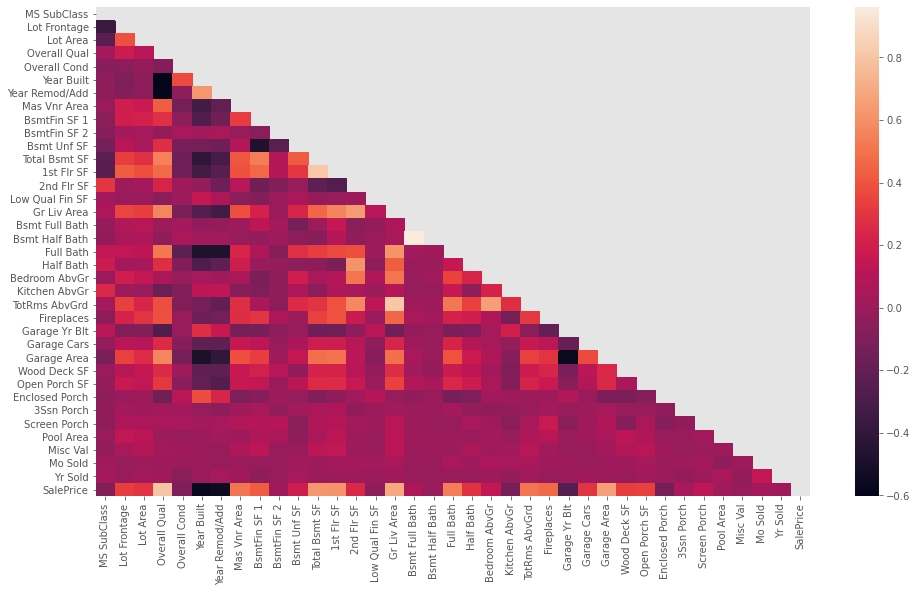

In [57]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train.corr(), mask=mask)

Interpretation: The heatmap shows the correlations between the different features in the dataset. You can see that the majority of the colours are in the purple range indicating that the corrlation is zero (ie. no relationship). Some darker relationships such as Year Built and Sale Price has  strong negative correlation. This means that as the age of the house increases, the sale price decreases.

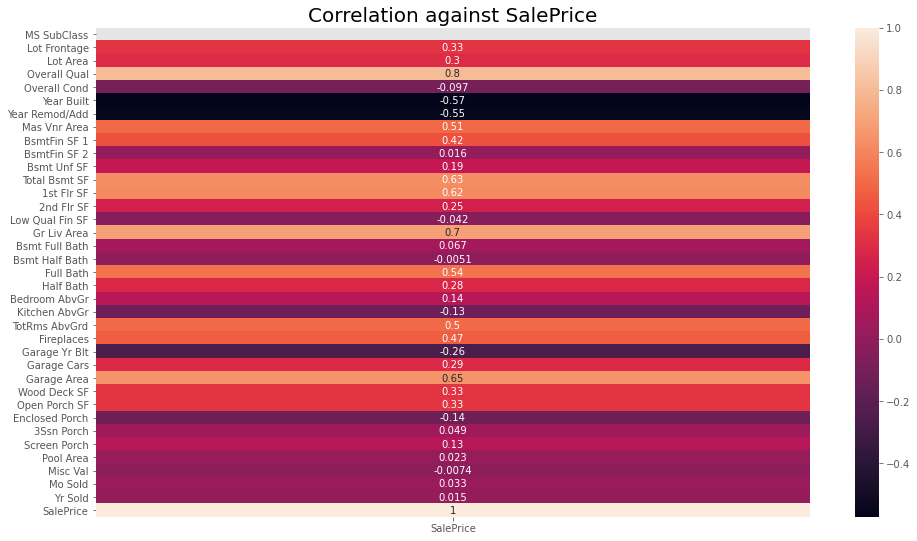

In [58]:
mask = np.zeros_like(df_train.corr()[['SalePrice']])
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(16,9))
sns.heatmap(df_train.corr()[['SalePrice']], mask=mask,annot=True)
plt.title("Correlation against SalePrice", size=20);

Interpretation: The columns with the highest correlation against SalePrice is Overall Quality with corr = 0.8, indicating strong positive correlation. As the overall quality goes up, so does the sale price. Features such as Year Built and Year Remod/Add have negative correlation suggesting that as age goes up, house price goes down.

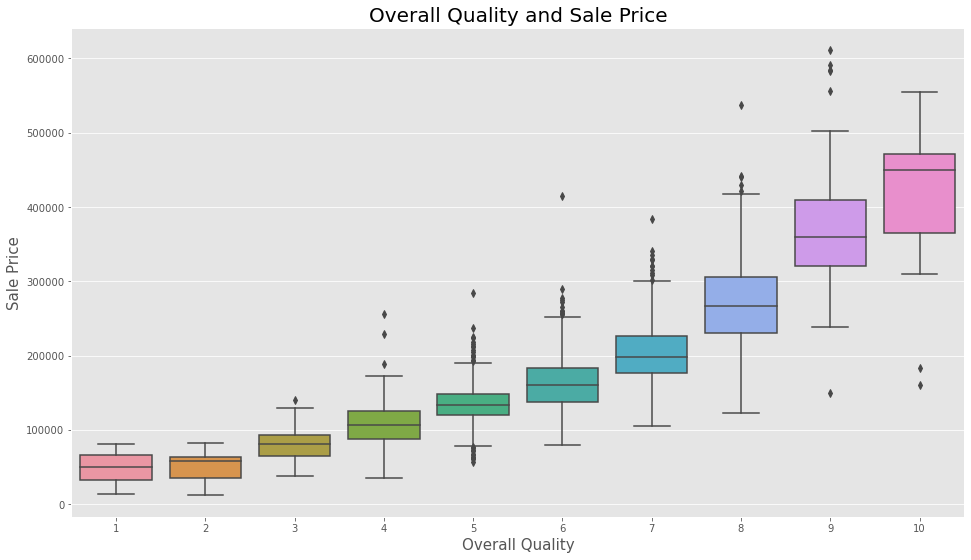

In [59]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_train,x='Overall Qual',y='SalePrice',order=sorted(list(df_train['Overall Qual'].unique())))
plt.title("Overall Quality and Sale Price",size = 20)
plt.xlabel('Overall Quality',size=15)
plt.ylabel('Sale Price',size=15);

Interpretation: Here you can clearly see that houses that are rated higher in terms of quality generally have higher sale price. It should be noted that houses that are higher quality generally have bigger Interquartile Range (Boxes are larger). This means that there for higher quality houses, there is a larger overall variations in the prices.

Text(0, 0.5, 'Sale Price')

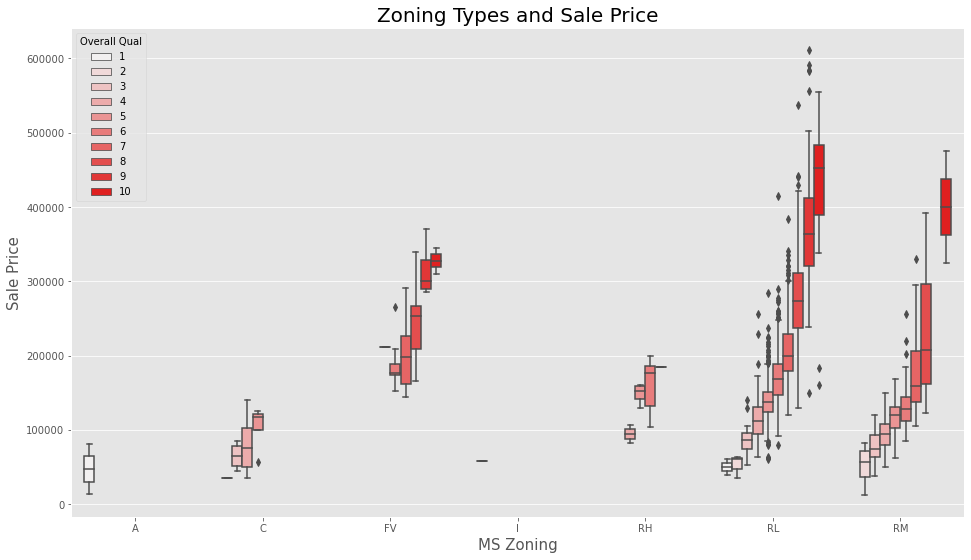

In [60]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_train,x='MS Zoning',y='SalePrice',hue='Overall Qual',color='red',order=sorted(list(df_train['MS Zoning'].unique())))
plt.title("Zoning Types and Sale Price",size = 20)
plt.xlabel('MS Zoning',size=15)
plt.ylabel('Sale Price',size=15)

In [61]:
df_train.groupby('MS Zoning')['SalePrice'].agg(['mean','max','min'])

,mean,max,min
MS Zoning,,,
A,47300.000000,81500,13100
C,78010.894737,140000,34900
FV,218618.316832,370878,144152
I,57625.000000,57625,57625
RH,148859.571429,200000,82000
RL,191235.164581,611657,35000
RM,129119.142405,475000,12789


Interpretation: We can see here that Floating Villages Residentials (FV) have the highest starting Sale Price when compared to other MS Zoning categories at 144152 USD. The Zoning Type that has the highest Sale Price mean is also FV at 218618 USD. Interestingly, the Zoning Type that has the largest maximum sale price does not belong to FV but rather RL (Residential Low Density) at 611657. The Zoning type that is the cheapest on average is A (Agriculture) at 47300. When looking at the overall picture, we can clearly see that residential properties (RH, RL, RM) tend to have higher price on average when compared to the other categories except for FV.

Text(0, 0.5, 'Sale Price')

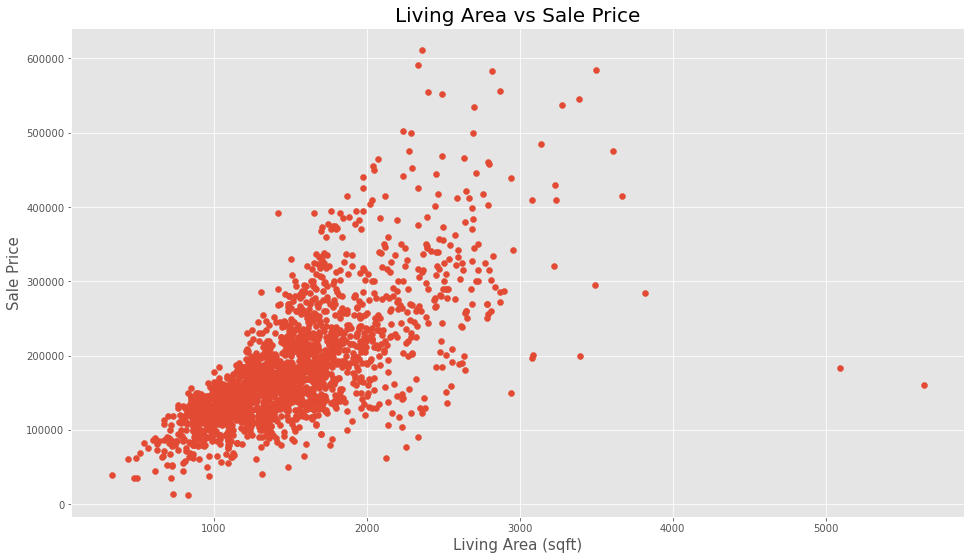

In [62]:
plt.figure(figsize=(16,9))
plt.scatter(df_train['Gr Liv Area'],df_train['SalePrice'])
plt.title("Living Area vs Sale Price",size = 20)
plt.xlabel("Living Area (sqft)", size = 15)
plt.ylabel("Sale Price", size = 15)

In [63]:
np.corrcoef(df_train['SalePrice'],df_train['Gr Liv Area'])[0][1]

0.6970384443056638

Interpretation: The above scatter plot shows the Sale Price versus the (ground) living area. It clearly indicates that there is a strong positive correlation of just under 0.7. Therefore, the larger the living area, the bigger the sale price.

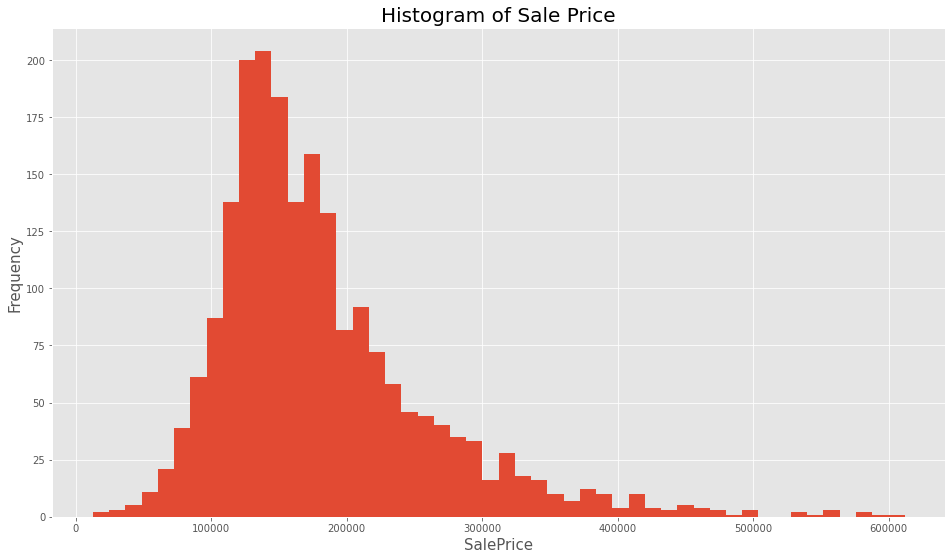

In [64]:
plt.figure(figsize=(16,9))
plt.hist(df_train['SalePrice'],bins=50)
plt.title("Histogram of Sale Price",size = 20)
plt.xlabel("SalePrice", size = 15)
plt.ylabel("Frequency", size = 15);

In [65]:
df_train['SalePrice'].agg(['median','mean'])

median    162500.000000
mean      181469.701609
Name: SalePrice, dtype: float64

In [66]:
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Interpretation: The histogram shows that the distribution of the sale prices looks to be right skewed. The calculations also show that mean > median by about 20000. The quartiles show that half of all of the sale prices lie between around 130000 and 214000.

## Predictive Models

In [67]:
df_train_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [68]:
df_test_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [69]:
df_train_standardised.shape

(2051, 335)

In [70]:
df_test_standardised.shape

(879, 335)

In [71]:
X = df_train_standardised[[col for col in df_train_standardised.columns if col != 'SalePrice']]
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [72]:
y = df_train['SalePrice']

In [73]:
X_test = df_test_standardised

In [74]:
y.shape

(2051,)

In [75]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols


print(selected_features_BE)


['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Screen Porch', 'Pool Area', 'MS Zoning_C', 'MS Zoning_RM', 'Lot Config_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_GrnHill', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_Names', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Condition 2_PosN', 'House Style_2.5Fin', 'Roof Style_Mansard', 'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exterior 1st_BrkFace', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Foundation_P

In [76]:
len(selected_features_BE)

97

Interpretation: Unnecessary features increase the complexity of the model. Hence it is good to have only the most significant features and keep our model simple to get the better result. The step above performs a feature selection using backward elimination. It works by starting off with all the features and proceeds to eliminate least important features (p > 0.01) in each iteration. This helps reduce the dimension of the dataframe from 335 columns down to 97 columns.

### Model 1 : Elastic Net BE

Description:

- Missing values have been imputed with mean (numerical) and mode (categorical)
- All categorical columns have been encoded with OneHotEncoder
- Polynomial Features (degree = 3) performed on columns that have correlation of > 0.6 against Sale Price.
- Features standardised
- Backwards Elimination to get important features (97 features)
- Elastic Net (best alpha = 825, best l1 ratio = 1)


In [77]:
X_subset = X[selected_features_BE]
X_test_subset = X_test[selected_features_BE]

In [78]:
elasticnetcv = ElasticNetCV(n_alphas=100, l1_ratio=np.arange(0.1,1.1,0.1),cv = 5, max_iter=2000)

In [79]:
elasticnetcv.fit(X_subset,y)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             max_iter=2000)

In [80]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

825.1161798740525

In [81]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [82]:
elasticnet = ElasticNet(alpha=opt_alpha,l1_ratio=opt_l1_ratio)
elasticnet.fit(X_subset,y)

ElasticNet(alpha=825.1161798740525, l1_ratio=1.0)

In [83]:
elasticnet.score(X_subset,y)

0.9216427265245168

In [84]:
cross_val_score(elasticnet,X_subset,y).mean()

0.8927683970108458

In [85]:
metrics.mean_squared_error(y, elasticnet.predict(X_subset),squared=False)

22180.96723523868

In [86]:
np.abs(cross_val_score(elasticnet,X_subset,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

25738.289382865136

In [87]:
y_test_pred = elasticnet.predict(X_test_subset)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic.csv',index=False)

#### Model 1 Evaluation

|   | Training R2 | Cross Val R2 | Training RMSE | Cross Val RMSE | Kaggle Private RMSE |
|---|-------------|--------------|---------------|----------------|---------------------|
|   | 0.922       | 0.893        | 22180         | 25738          | 27713               |

Model 1 shows a that it is significantly better than the baseline model (mean model). The r2 is 0.89 for cross validation. However, the model shows relatively high difference in the RMSE score between the training, cross validation and Kaggle test set. This shows an overfit - low bias and high variance. 

The Elastic model here uses alpha of 825 and l1_ratio of 1, which essentially turns the model into a Lasso model. The optimal alpha and l1 ratio was found using from ElasticNetCV.

### Model 2 :Linear Regression BE

Description:

- Missing values have been imputed with mean (numerical) and mode (categorical)
- All categorical columns have been encoded with OneHotEncoder
- Polynomial Features (degree = 3) performed on columns that have correlation of > 0.6 against Sale Price.
- Features standardised
- Backwards Elimination to get important features (97 features)
- Linear Regression

In [88]:
lr = LinearRegression()
lr.fit(X_subset,y)

LinearRegression()

In [89]:
lr.score(X_subset,y)

0.9516255804790791

In [90]:
cross_val_score(lr,X_subset,y).mean()

-2.214479067391059e+22

In [91]:
metrics.mean_squared_error(y, lr.predict(X_subset),squared=False)

17428.046327226184

In [92]:
np.abs(cross_val_score(lr,X_subset,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

5331596263662196.0

#### Model 2 Evaluation

|   | Training R2 | Cross Val R2 | Training RMSE | Cross Val RMSE |
|---|-------------|--------------|---------------|----------------|
|   | 0.951       | -2.214        | 17428         | $5×10^{15}$          |

Despite having only used features extracted from backward elimination, Model 2 is horrible. In fact, it performs worse than the baseline model as indicated by the negative cross val score (r2).
The model is massively overfitted with very low cross val RMSE and bias but extremely high variance. Since this is a linear regression without any penalty terms, the model read the noise from all the columns and this, in turn, resulted in an abysmal model.

### Model 3 : Elastic Net All Features 

Description:

- Missing values have been imputed with mean (numerical) and mode (categorical)
- Polynomial Features (degree = 3) performed on columns that have correlation of > 0.6 against Sale Price.
- All categorical columns have been encoded with OneHotEncoder
- Features standardised
- Using all features (335 features)
- Elastic Net (best alpha = 475, best l1 ratio = 1)



In [93]:
elasticnetcv.fit(X,y)
opt_alpha = elasticnetcv.alpha_
opt_alpha

D:\Users\Boss\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1246788256.8987427, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(


475.72438366878174

In [94]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [95]:
elasticnet = ElasticNet(alpha=opt_alpha,l1_ratio=opt_l1_ratio)
elasticnet.fit(X,y)

ElasticNet(alpha=475.72438366878174, l1_ratio=1.0)

In [96]:
elasticnet.score(X,y)

0.9393495786098461

In [97]:
cross_val_score(elasticnet,X,y).mean()

D:\Users\Boss\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2005572127.8356934, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
D:\Users\Boss\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066364769.5078125, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent(


0.9024423435500563

In [98]:
metrics.mean_squared_error(y, elasticnet.predict(X),squared=False)

19514.51372355443

In [99]:
np.abs(cross_val_score(elasticnet,X,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

D:\Users\Boss\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2005572127.8356934, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
D:\Users\Boss\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066364769.5078125, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent(


24505.81010040713

In [100]:
y_test_pred = elasticnet.predict(X_test)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_all_features.csv',index=False)

#### Model 3 Evaluation

|   | Training R2 | Cross Val R2 | Training RMSE | Cross Val RMSE | Kaggle Private RMSE |
|---|-------------|--------------|---------------|----------------|---------------------|
|   | 0.939       | 0.902        | 19514         | 24505          | 27505               |

Model 3 shows a that it is significantly better than the baseline model (mean model). The r2 is 0.90 for cross validation. However, this model has a massive problem with overfitting. As can be seen the training RMSE is 19514 however the cross validation rmse and Kaggle rmse are much higher in the range of 23000-27000. This could be because the model is way too complex with over 300 features. 

The Elastic model here uses alpha of 475 and l1_ratio of 1, which essentially turns the model into a Lasso model. The optimal alpha and l1 ratio was found using from ElasticNetCV.

### Model 4 : Elastic Net (Target Encoded+OneHotEncoded) - Best Performing Model

- Missing values have been imputed with mean (numerical) and mode (categorical)
- Categories columns that are ordinal have been encoded using Target Encoder (Mean Encoder)
- Categories columns that aren't ordinal have been encoded using OneHotEncoder
- Polynomial Features (degree = 3) performed on columns that have correlation of > 0.6 against Sale Price.
- Features standardised
- Backwards Elimination to get important features (99 features)
- Elastic Net (best alpha = 674, best l1 ratio = 1)


In [101]:
elasticnetcv = ElasticNetCV(n_alphas=100, l1_ratio=np.arange(0.1,1.1,0.1),cv = 5)

In [102]:
df_train_te = df_train.copy(deep=True)
df_test_te = df_test.copy(deep=True)

In [103]:
df_train_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,35.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,14.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Gd,MnPrv,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,58.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Gd,MnPrv,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Gd,BuiltIn,4.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Gd,MnPrv,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Gd,Detchd,54.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,138500


Interpretation: Target encoding is used here instead of OneHotEncoder because the categories in the columns are ordinal meaning that there is an underlying order of importance (eg. 1 < 5). Target encoder allows us to map these classes into the appropriate values using the target feature.

In [104]:
ordinal_columns = ['Lot Shape','Utilities','Land Slope','Exter Qual', 'Exter Cond','Bsmt Qual','Bsmt Cond',
                   'Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC','Bsmt Exposure',
                  'BsmtFin Type 1','BsmtFin Type 2','Electrical','Functional','Garage Finish','Paved Drive','Fence']

In [105]:
te = TargetEncoder()
te.fit(df_train_te[ordinal_columns],df_train_te['SalePrice'])

D:\Users\Boss\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC',
                    'Kitchen Qual', 'Fireplace Qu', 'Garage Qual',
                    'Garage Cond', 'Pool QC', 'Bsmt Exposure', 'BsmtFin Type 1',
                    'BsmtFin Type 2', 'Electrical', 'Functional',
                    'Garage Finish', 'Paved Drive', 'Fence'])

In [106]:
df_train_target_encoded = te.transform(df_train_te[ordinal_columns])
df_train_target_encoded

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
1,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,204893.621622,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
2,162925.812355,181551.602245,180358.476703,143270.978348,167623.023256,138023.926752,181760.117522,138986.705193,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
3,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
4,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,107752.166667,223969.550562,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2047,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,216027.607512,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
2048,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,160174.009404,139501.607450,204893.621622,116184.890244,107387.957447,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
2049,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,143263.382514,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919


In [107]:
df_train_te.drop(columns=ordinal_columns,inplace=True)
df_train_te

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,CBlock,533.0,0.0,192.0,725.0,GasA,Y,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,Attchd,35.0,2.0,475.0,0,44,0,0,0,0,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,PConc,637.0,0.0,276.0,913.0,GasA,Y,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,Attchd,14.0,2.0,559.0,0,74,0,0,0,0,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,731.0,0.0,326.0,1057.0,GasA,Y,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,Detchd,58.0,1.0,246.0,0,52,0,0,0,0,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0.0,0.0,384.0,384.0,GasA,Y,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,BuiltIn,4.0,2.0,400.0,100,0,0,0,0,0,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,PConc,0.0,0.0,676.0,676.0,GasA,Y,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,Detchd,54.0,2.0,484.0,0,59,0,0,0,0,Shed,0,3,1,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0000,11449,Pave,Grvl,HLS,Inside,Timber,Norm,Norm,1Fam,1Story,8,5,4,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,1011.0,0.0,873.0,1884.0,GasA,Y,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,Attchd,4.0,2.0,520.0,0,276,0,0,0,0,Shed,0,1,3,WD,298751
2047,30,RL,69.0552,12342,Pave,Grvl,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,4,5,71,61,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,262.0,0.0,599.0,861.0,GasA,Y,861,0,0,861,0.0,0.0,1,0,1,1,4,0,Detchd,50.0,2.0,539.0,158,0,0,0,0,0,Shed,0,3,2,WD,82500
2048,50,RL,57.0000,7558,Pave,Grvl,Bnk,Inside,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,83,61,Gable,CompShg,BrkFace,Stone,None,0.0,BrkTil,0.0,0.0,896.0,896.0,GasA,Y,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,Detchd,82.0,2.0,342.0,0,0,0,0,0,0,Shed,0,3,2,WD,177000
2049,20,RL,80.0000,10400,Pave,Grvl,Lvl,Corner,Names,Norm,Norm,1Fam,1Story,4,5,55,55,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,155.0,750.0,295.0,1200.0,GasA,Y,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,Attchd,55.0,1.0,294.0,0,189,140,0,0,0,Shed,0,11,2,WD,144000


In [108]:
df_train_te = df_train_te.join(df_train_target_encoded)
df_train_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,60,RL,69.0552,13517,Pave,Grvl,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,CBlock,533.0,0.0,192.0,725.0,GasA,Y,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,Attchd,35.0,2.0,475.0,0,44,0,0,0,0,Shed,0,3,1,WD,130500,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
1,60,RL,43.0000,11492,Pave,Grvl,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,PConc,637.0,0.0,276.0,913.0,GasA,Y,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,Attchd,14.0,2.0,559.0,0,74,0,0,0,0,Shed,0,4,2,WD,220000,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,204893.621622,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
2,20,RL,68.0000,7922,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,731.0,0.0,326.0,1057.0,GasA,Y,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,Detchd,58.0,1.0,246.0,0,52,0,0,0,0,Shed,0,1,1,WD,109000,162925.812355,181551.602245,180358.476703,143270.978348,167623.023256,138023.926752,181760.117522,138986.705193,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
3,60,RL,73.0000,9802,Pave,Grvl,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0.0,0.0,384.0,384.0,GasA,Y,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,BuiltIn,4.0,2.0,400.0,100,0,0,0,0,0,Shed,0,4,1,WD,174000,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
4,50,RL,82.0000,14235,Pave,Grvl,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,PConc,0.0,0.0,676.0,676.0,GasA,Y,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,Detchd,54.0,2.0,484.0,0,59,0,0,0,0,Shed,0,3,1,WD,138500,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,107752.166667,223969.550562,138986.705193,139501.607450,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919


In [109]:
df_train_te.shape

(2051, 79)

In [110]:
df_train_te_copy = df_train_te.copy(deep=True) #Store this as a copy - to train the test set using encode_category()
df_train_te = encode_categories(df_train_te,df_train_te)
df_train_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,60,69.0552,13517,6,8,35,6,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,35.0,2.0,475.0,0,44,0,0,0,0,0,1,130500,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.

In [111]:
df_train_te.shape

(2051, 204)

In [112]:
df_test_target_encoded = te.transform(df_test_te[ordinal_columns])
df_test_target_encoded

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919
1,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,223969.550562,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
3,162925.812355,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,116184.890244,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
4,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,204893.621622,183494.547790,183487.060545,181469.701609,162337.353615,164368.017065,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
875,162925.812355,181551.602245,180358.476703,230802.484935,167623.023256,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
876,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,216027.607512,139501.607450,204893.621622,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
877,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,164368.017065,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,141499.162500


In [113]:
df_test_te.drop(columns=ordinal_columns,inplace=True)
df_test_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.000000,9142,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,2FmCon,2Story,6,8,101,61,Gable,CompShg,AsbShng,AsbShng,None,0.0,Stone,0.0,0.0,1020.0,1020.0,GasA,N,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,Detchd,101.0,1.0,440.0,0,60,112,0,0,0,Shed,0,4,5,WD
1,90,RL,69.630042,9662,Pave,Grvl,Lvl,Inside,Sawyer,Norm,Norm,Duplx,1Story,5,4,34,34,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,0.0,0.0,1967.0,1967.0,GasA,Y,1967,0,0,1967,0.0,0.0,2,0,6,2,10,0,Attchd,34.0,2.0,580.0,170,0,0,0,0,0,Shed,0,8,5,WD
2,60,RL,58.000000,17104,Pave,Grvl,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,554.0,0.0,100.0,654.0,GasA,Y,664,832,0,1496,1.0,0.0,2,1,3,1,7,1,Attchd,5.0,2.0,426.0,100,24,0,0,0,0,Shed,0,9,5,New
3,30,RM,60.000000,8520,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,5,6,88,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,CBlock,0.0,0.0,968.0,968.0,GasA,Y,968,0,0,968,0.0,0.0,1,0,2,1,5,0,Detchd,76.0,2.0,480.0,0,0,184,0,0,0,Shed,0,7,4,WD
4,20,RL,69.630042,9500,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,6,5,48,48,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,CBlock,609.0,0.0,785.0,1394.0,GasA,Y,1394,0,0,1394,1.0,0.0,1,1,3,1,6,2,Attchd,48.0,2.0,514.0,0,76,0,0,185,0,Shed,0,7,2,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,60,RL,80.000000,8000,Pave,Grvl,Lvl,Inside,NWAmes,PosN,Norm,1Fam,2Story,6,6,37,37,Gable,CompShg,HdBoard,HdBoard,None,0.0,CBlock,931.0,153.0,0.0,1084.0,GasA,Y,1084,793,0,1877,1.0,0.0,2,1,4,1,8,1,Attchd,37.0,2.0,488.0,0,96,0,0,0,0,Shed,0,11,4,WD
875,60,RL,90.000000,14670,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,2Story,6,7,45,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,CBlock,575.0,0.0,529.0,1104.0,GasA,Y,1104,884,0,1988,0.0,0.0,2,1,4,1,9,1,Attchd,45.0,2.0,480.0,0,230,0,0,0,0,Shed,0,8,3,WD
876,20,RL,55.000000,8250,Pave,Grvl,Lvl,Inside,Sawyer,Feedr,Norm,1Fam,1Story,5,5,43,43,Hip,CompShg,HdBoard,HdBoard,None,0.0,CBlock,250.0,492.0,210.0,952.0,GasA,Y,1211,0,0,1211,0.0,0.0,1,0,3,1,5,1,Attchd,43.0,1.0,322.0,0,63,0,0,0,0,Shed,0,8,3,WD
877,20,RL,60.000000,9000,Pave,Grvl,Lvl,FR2,Names,Norm,Norm,1Fam,1Story,4,6,40,40,Gable,CompShg,HdBoard,HdBoard,None,0.0,PConc,616.0,0.0,248.0,864.0,GasA,Y,864,0,0,864,0.0,0.0,1,0,3,1,5,0,Detchd,37.0,2.0,528.0,0,0,0,0,0,0,Shed,0,5,4,WD


In [114]:
df_test_te = df_test_te.join(df_test_target_encoded)
df_test_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,190,RM,69.000000,9142,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,2FmCon,2Story,6,8,101,61,Gable,CompShg,AsbShng,AsbShng,None,0.0,Stone,0.0,0.0,1020.0,1020.0,GasA,N,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,Detchd,101.0,1.0,440.0,0,60,112,0,0,0,Shed,0,4,5,WD,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919
1,90,RL,69.630042,9662,Pave,Grvl,Lvl,Inside,Sawyer,Norm,Norm,Duplx,1Story,5,4,34,34,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,0.0,0.0,1967.0,1967.0,GasA,Y,1967,0,0,1967,0.0,0.0,2,0,6,2,10,0,Attchd,34.0,2.0,580.0,170,0,0,0,0,0,Shed,0,8,5,WD,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2,60,RL,58.000000,17104,Pave,Grvl,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,554.0,0.0,100.0,654.0,GasA,Y,664,832,0,1496,1.0,0.0,2,1,3,1,7,1,Attchd,5.0,2.0,426.0,100,24,0,0,0,0,Shed,0,9,5,New,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,223969.550562,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
3,30,RM,60.000000,8520,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,5,6,88,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,CBlock,0.0,0.0,968.0,968.0,GasA,Y,968,0,0,968,0.0,0.0,1,0,2,1,5,0,Detchd,76.0,2.0,480.0,0,0,184,0,0,0,Shed,0,7,4,WD,162925.812355,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,116184.890244,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
4,20,RL,69.630042,9500,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,6,5,48,48,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,CBlock,609.0,0.0,785.0,1394.0,GasA,Y,1394,0,0,1394,1.0,0.0,1,1,3,1,6,2,Attchd,48.0,2.0,514.0,0,76,0,0,185,0,Shed,0,7,2,WD,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919


In [115]:
df_test_te = encode_categories(df_test_te,df_train_te_copy)
df_test_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,190,69.000000,9142,6,8,101,61,0.0,0.0,0.0,1020.0,1020.0,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,101.0,1.0,440.0,0,60,112,0,0,0,0,5,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [116]:
useless_cols = ['Exter Qual_TA', 'Bsmt Qual_TA', 'Kitchen Qual_TA', 'Yr_Blt_Remod', 'Garage Finish_Unf']
poly_cols = [col for col in saleprice_corr.index if col not in useless_cols]

In [117]:
df_train_te_complete = df_train_te.copy(deep=True)
df_train_te_complete['SalePrice'] = df_train_te_copy['SalePrice']

In [118]:
saleprice_corr = df_train_te_complete.corr()['SalePrice'].sort_values(key= lambda x: np.abs(x),ascending=False)
saleprice_corr = saleprice_corr[(1 > np.abs(saleprice_corr)) & (np.abs(saleprice_corr) > corr_thres)]
saleprice_corr

Overall Qual     0.800207
Exter Qual       0.724048
Bsmt Qual        0.711539
Kitchen Qual     0.710707
Gr Liv Area      0.697038
Garage Area      0.650043
Total Bsmt SF    0.629313
1st Flr SF       0.618486
Name: SalePrice, dtype: float64

Interpretation: The numbers above show the correlation between the feature against the Sale Price.

In [119]:
# Polynomial
poly = PolynomialFeatures(poly_degree,include_bias=False)

poly_df = df_train_te[saleprice_corr.index]
poly_df = pd.DataFrame(poly.fit_transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,len(saleprice_corr):]
df_train_te = df_train_te.join(poly_df)

poly_df = df_test_te[saleprice_corr.index]
poly_df = pd.DataFrame(poly.transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,len(saleprice_corr):]
df_test_te = df_test_te.join(poly_df)

Interpretation: Similar to the steps explained at the beginning, we are creating Polynomial Features with degree of 3 based on features that are highly correlated to SalePrice ( corr > 0.6).

In [120]:
df_test_te = standardise(df_test_te,df_train_te) 
df_train_te = standardise(df_train_te,df_train_te) #doesn't return the column with SalePrice

In [121]:
df_train_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Overall Qual^2,Overall Qual Exter Qual,Overall Qual Bsmt Qual,Overall Qual Kitchen Qual,Overall Qual Gr Liv Area,Overall Qual Garage Area,Overall Qual Total Bsmt SF,Overall Qual 1st Flr SF,Exter Qual^2,Exter Qual Bsmt Qual,Exter Qual Kitchen Qual,Exter Qual Gr Liv Area,Exter Qual Garage Area,Exter Qual Total Bsmt SF,Exter Qual 1st Flr SF,Bsmt Qual^2,Bsmt Qual Kitchen Qual,Bsmt Qual Gr Liv Area,Bsmt Qual Garage Area,Bsmt Qual Total Bsmt SF,Bsmt Qual 1st Flr SF,Kitchen Qual^2,Kitchen Qual Gr Liv Area,Kitchen Qual Garage Area,Kitchen Qual Total Bsmt SF,Kitchen Qual 1st Flr SF,Gr Liv Area^2,Gr Liv Area Garage Area,Gr Liv Area Total Bsmt SF,Gr Liv Area 1st Flr SF,Garage Area^2,Garage Area Total Bsmt SF,Garage Area 1st Flr SF,T

In [122]:
df_train_te.shape

(2051, 359)

In [123]:
df_test_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Overall Qual^2,Overall Qual Exter Qual,Overall Qual Bsmt Qual,Overall Qual Kitchen Qual,Overall Qual Gr Liv Area,Overall Qual Garage Area,Overall Qual Total Bsmt SF,Overall Qual 1st Flr SF,Exter Qual^2,Exter Qual Bsmt Qual,Exter Qual Kitchen Qual,Exter Qual Gr Liv Area,Exter Qual Garage Area,Exter Qual Total Bsmt SF,Exter Qual 1st Flr SF,Bsmt Qual^2,Bsmt Qual Kitchen Qual,Bsmt Qual Gr Liv Area,Bsmt Qual Garage Area,Bsmt Qual Total Bsmt SF,Bsmt Qual 1st Flr SF,Kitchen Qual^2,Kitchen Qual Gr Liv Area,Kitchen Qual Garage Area,Kitchen Qual Total Bsmt SF,Kitchen Qual 1st Flr SF,Gr Liv Area^2,Gr Liv Area Garage Area,Gr Liv Area Total Bsmt SF,Gr Liv Area 1st Flr SF,Garage Area^2,Garage Area Total Bsmt SF,Garage Area 1st Flr SF,T

In [124]:
df_test_te.shape

(879, 359)

In [125]:
# X = df_train_te[[col for col in df_train_te.columns if col != 'SalePrice']]
# X

In [126]:
X = df_train_te
y = df_train_te_copy['SalePrice']

In [127]:
X.shape

(2051, 359)

In [128]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area', 'Screen Porch', 'Pool Area', 'Heating QC', 'Kitchen Qual', 'Bsmt Exposure', 'BsmtFin Type 2', 'Functional', 'MS Zoning_FV', 'MS Zoning_RL', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_GrnHill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Condition 2_PosN', 'Roof Style_Mansard', 'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exterior 1st_BrkFace', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Foundation_PConc', 'Misc Feature_Gar2', 'Misc Feature_Othr', 'Misc Feature_Shed', 'Misc Feature_TenC', 'Sale Type_Con', 'Sale Typ

In [129]:
len(selected_features_BE)

99

Interpretation: Backward Eliminations to get down to 99 important features from 359 features.

In [130]:
X = X[selected_features_BE]
X_test = df_test_te[selected_features_BE]

In [131]:
elasticnetcv.fit(X,y)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [132]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

674.7394218203452

In [133]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [134]:
elasticnet = ElasticNet(alpha=opt_alpha,l1_ratio=opt_l1_ratio)
elasticnet.fit(X,y)

ElasticNet(alpha=674.7394218203452, l1_ratio=1.0)

In [135]:
elasticnet.score(X,y)

0.9302905634265305

In [136]:
cross_val_score(elasticnet,X,y).mean()

0.9050455625878595

In [137]:
metrics.mean_squared_error(y, elasticnet.predict(X),squared=False)

20921.200840828566

In [138]:
np.abs(cross_val_score(elasticnet,X,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

24251.329081334447

In [139]:
y_test_pred = elasticnet.predict(X_test)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_te.csv',index=False)

In [140]:
coef = list(zip(elasticnet.coef_,X.columns))
important_feats = sorted(coef, key=lambda x: np.abs(x[0]),reverse=True)
important_feats[:5]

[(-21256.863022557725, 'Gr Liv Area^2 Total Bsmt SF'),
 (19505.015532660454, 'Gr Liv Area'),
 (18976.496977384428, 'Overall Qual^2 Gr Liv Area'),
 (-9979.309738142503, 'Gr Liv Area 1st Flr SF^2'),
 (8499.539433900221, 'Kitchen Qual^2 Gr Liv Area')]

In [141]:
[x for x in important_feats if x[1] in ['Year Built','Year Remod/Add']]

[(-6871.737296722688, 'Year Built'), (-1702.0638255470276, 'Year Remod/Add')]

*Note that Year Built and Year Remod/Add has been converted at the beginning to reflect the Age and Years since remod/add with the base year as 2011. For example, a house that was built in 2001 would have a Year Built value of 10.

Interpretation: Above shows the five most important features as given by the model. They are mostly polynomial features meaning that these combined features go hand in hand in providing us with the necessary information to predict the sale price. Across the top five polynomial features, 'Gr Liv Area' which represents the (ground) living area are present in all of them. This solidifies the fact that the size of the living area above ground is extremely important when it comes to pricing. Looking at the second most important feature (19505.015532660454, 'Gr Liv Area'), an increase of one sqft of the living area increases the sale price by 19505 USD. Another factor that is also important is the Overall Quality and Kitchen Quality and the (ground) living area. Priorities should be placed on ensuring that the living space is large and is of high quality as shown by the coefficient/feature (18976.496977384428, 'Overall Qual^2 Gr Liv Area') and that the kitchen should be relatively high quality and is large (8499.539433900221, 'Kitchen Qual^2 Gr Liv Area'). Some features that negatively impact the price of the houses include the age of the house and the year since it was last remod/add. An increase one year to the age of the house results in a reduction of 6871 USD from the sale price.

Text(0, 0.5, 'Predicted SalePrice')

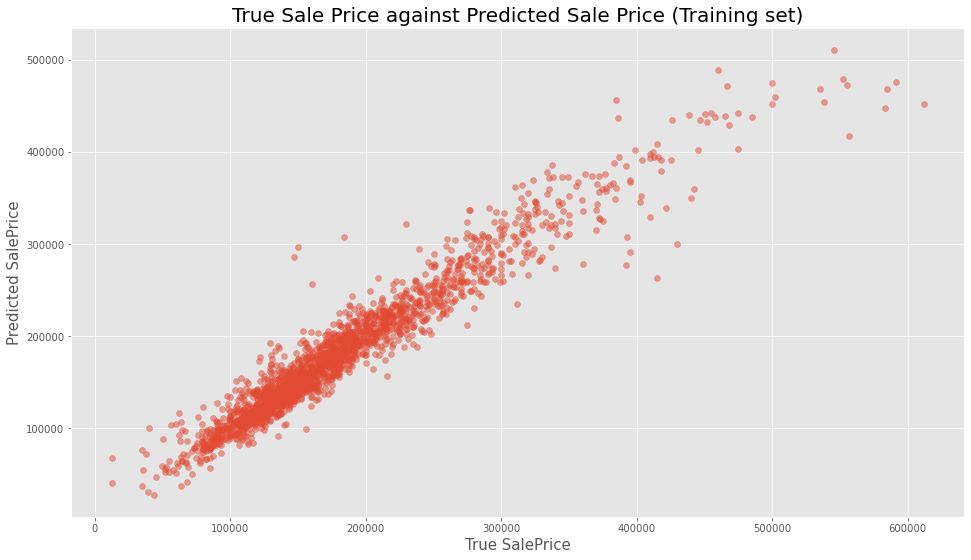

In [151]:
plt.figure(figsize=(16,9))
plt.scatter(y,elasticnet.predict(X),alpha = 0.5)
plt.title("True Sale Price against Predicted Sale Price (Training set)", size = 20)
plt.xlabel("True SalePrice",size=15)
plt.ylabel("Predicted SalePrice",size=15)

Text(0, 0.5, 'Residuals')

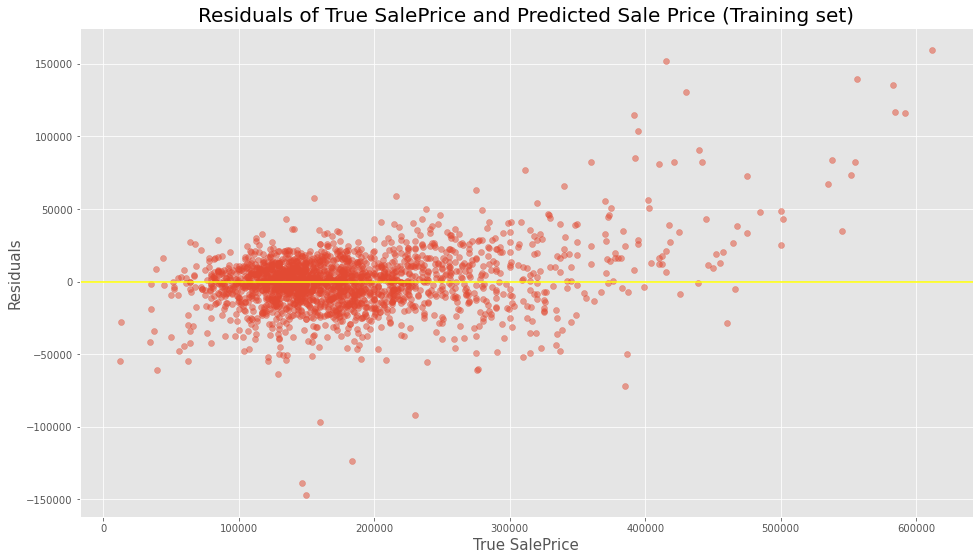

In [157]:
plt.figure(figsize=(16,9))
plt.scatter(y,y - elasticnet.predict(X),alpha = 0.5)
plt.title("Residuals of True SalePrice and Predicted Sale Price (Training set)", size = 20)
plt.axhline(0,color = 'yellow')
plt.xlabel("True SalePrice",size=15)
plt.ylabel("Residuals",size=15)

Interpretation: You can see that the first graph shows a strong relationship between the True SalePrice and Predicted sale price. It can be seen that the graph is heteroscedastic meaning that the variance of error increases as we move up the x-axis (True SalePrice). The second graph clearly illustrates heteroscedasticity. The residuals can be seen to be more tightly grouped together (low variance) where the True SalePrice is low but become more dispersed (higher variance) when the True SalePrice gets higher.


#### Model 4 Evaluation (Best Performing Model)

|   | Training R2 | Cross Val R2 | Training RMSE | Cross Val RMSE | Kaggle Private RMSE |
|---|-------------|--------------|---------------|----------------|---------------------|
|   | 0.930       | 0.905        | 20921         | 24251          | 25412               |

Model 4 shows a that it is significantly better than the baseline model (mean model). The r2 is 0.90 for cross validation. However, this model looks like it has a problem with overfitting. As can be seen the training RMSE is 20921 however the cross validation rmse and Kaggle rmse are higher. However, compared to the previous model, Model 4 seems to be doing better than the others in terms of overfitting. The bias is low. The variance is high but not as bad as the previous three models.

The Elastic model here uses alpha of 674 and l1_ratio of 1, which essentially turns the model into a Lasso model. The optimal alpha and l1 ratio was found using from ElasticNetCV.

## Evaluation

|         | Training R2 | Cross Val R2 | Training RMSE | Cross Val RMSE | Kaggle Private RMSE |
|---------|-------------|--------------|---------------|----------------|---------------------|
| Model 1 | 0.922       | 0.893        | 22180         | 25738          | 27713               |
| Model 2 | 0.951       | -2.214       | 17428         |$5×10^{15}$     |N/A                  |
| Model 3 | 0.939       | 0.902        | 19514         | 24505          | 27505               |
| Model 4 | 0.930       | 0.905        | 20921         | 24251          | 25412               |

Overall, out of the four models constructed, the best model is Model 4. This model uses elastic net with optimal l1 being 1 (and therefore, is Lasso). The model is similar to the other three models in how the features were transformed. The missing values have been treated the same way (mean/mode). They were given Polynomial Features (degree of 3) based on features that had strong correlation to the target feature. They were scaled using Standard Scaler. The one difference is that the encoding proces. Unlike the features in other models that were encoded using just OneHotEncoder, the features that went into Model 4 had been encoded using Target Encoder for ordinal columns and OneHotEncoder for the remaining categorical columns. This resulted in a model that balances between bias and variance. It may not have the lowest training rmse but it does much better at unseen data as shown by the cross val rmse and Kaggle private RMSE.

#### Metrics
Model 4's R2 value for both the training dataset and cross validation are not too far off of each other (3%). The cross validation r2 shows that it is much better at predicting the sale price compared to the base model of just predicting the mean sale price. When we look at the RMSE scores which indicates the average residual/error for the predictions, it can be seen that in the Model 2, which uses OLR Regression, performed the best in the training set but severely struggled on unseen data. It performed worse than the baseline model.

Evidently, despite the fact that it scored worse on training data RMSE than Model 2 and 3, it performed the best on unseen data, both from cross valudation and on Kaggle. The reduction in performance for the training and cross val/Kaggle does indicate an overfit - high variance. It is acceptable (from ~21000 for training to ~25000 cross val/Kaggle). The bias is also the lowest amongst the models on unseen data.

#### Limitations
Although Model 4 can be used to predict sale price satisfactorily with error of +/-25000 on average, it should be noted that there are many other factors that can influence the sale price of properties. The current model uses features directly related to the houses themselves such as overall quality, size, shape and more. It does not use features such as the unemployment rate, inflation rate and the state of the economy to take into account the house prices. These additional features no doubt has an impact on how much houses are sold for. Future models could take into account these factors which may help improve the quality of the predictions.


## Conclusion

In conclusion, we have learnt is that the distribution of the prices overall are right skewed. The finding shows that half of all of the sale prices in the dataset lie between around 130000 and 214000. The mean price is 181469 USD with the sale price ranging from 12789 USD up to 611657 USD. We have seen that Floating Villages Residentials (FV) have the highest starting Sale Price when compared to other Zoning categories at 144152 USD. The Zoning Type that has the highest Sale Price on average is also FV at 218618 USD. Interestingly, the Zoning Type that has the largest maximum sale price does not belong to FV but rather RL (Residential Low Density) at 611657. The cheapest Zoning type on average is A (Agriculture) at 47300. We have also identified that residential properties (RH, RL, RM) tend to have higher sale price on average when compared to the other categories except for FV.

The study has also identified the of the interesting features that real estate/development firms should be focusing on in order to increase the values of the houses. Our best model (Model 4), has given us the insight of the importance of the size of the living area when it comes to house pricing. In fact, an incrase of 1 square feet of the living area (above ground) would increase the sale price by 19505 USD. Other factors include the overall quality of the house (Overall Qual) and the quality of the kitchen. Some of the features that were shown to have moderate negative correaltion with the sale price are Year Built and Year Remod/Add, -0.57 and -0.55 respectively. Model 4 also provide us with some insights confirming this. An increase one year to the age of the house results in a reduction of 6871 USD from the sale price, while an increase of one year since last house remodel/addition decreases the price by 1702 USD. This means that to incrase the value of the house before sale, it should either be relatively newly built or it should be modified/remodelled recently.

Finally, real estate firms should be able to use Model 4 to give a rough guideline on the sale prices for new properties entering the market. Since the Model has around 24000 RMSE, it means the errors in the prediction could be +/- 24000 on average. The model could additionally be used on existing properties in the market to give insights into why some properties remain unsold. This could be because the sale price is too high (very far from Model 4's prediction level) or it could be needing some refits, for instance. 

